In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('seaborn-talk')
from matplotlib import cm
import numpy as np
import os
import scipy.io
import seaborn as sb
from scipy.fftpack import fft
import csv
import pandas as pd
from scipy.signal import butter, filtfilt
import glob
import seaborn as sns
import scikit_posthocs as sp
from scipy import signal

In [2]:
# Pathways
outpath = r'C:\Users\Daniellab\Desktop\Jorge_Analysis\Tortuosity\chunking'
figpath = r'C:\Users\Daniellab\Desktop\Jorge_Analysis\Tortuosity\chunking\figures'
source = r'C:\Users\Daniellab\Desktop\Jorge_Analysis\Centroids_Final\Raw_NG'

In [3]:
def removeNaN(df): 
    if np.any(df.X_position.isnull()):
        a = np.asarray(np.where(df.X_position.isnull())).ravel()
        b = a[1:]
        c = a[:-1]
        d = b-c
        last_chunk = len(df.X_position) - a[-1]


        if last_chunk > 100:

            start = a[-1]+1
            end = a[-1] + last_chunk-1

        elif a[0] > 100:
            start = 0
            end = a[0]-1


        elif d.max() > 100:
            e = d.argmax()
            start = a[e]+1
            end = a[e+1]-1

        else:
            print('error')
    
        x_no_nan = df.X_position.values[start:end]
        y_no_nan = df.Y_position.values[start:end]
        return(x_no_nan, y_no_nan)
    else:
        x = df.X_position.values
        y = df.Y_position.values
        return(x,y)

In [4]:
def tortuosity_ratio(x,y,chunk):
    
    n = np.arange(0,len(x),chunk)
    ratio_list = []
    
    for element in n[1:]:

        shortest_path = np.sqrt((x[element]-x[element-chunk])**2 + (y[element]-y[element-chunk])**2)

        i = 1
        actual_list = 0
        for e in x[element-chunk:element-1]:

            actual_path = np.sqrt((x[element-chunk:element][i]-x[element-chunk:element][i-1])**2 + (y[element-chunk:element][i]-y[element-chunk:element][i-1])**2)
            actual_list += actual_path

            i +=1
            
        ratio = actual_list/shortest_path
        ratio_list.append(ratio)
        
        mean = np.mean(ratio_list)
        std = np.std(ratio_list)
    return(mean, std)

In [5]:
csv_list = glob.glob(source + '\*Centroid*.csv')
print(len(csv_list))

52


Experimental_1_150214
0.9208721271044904


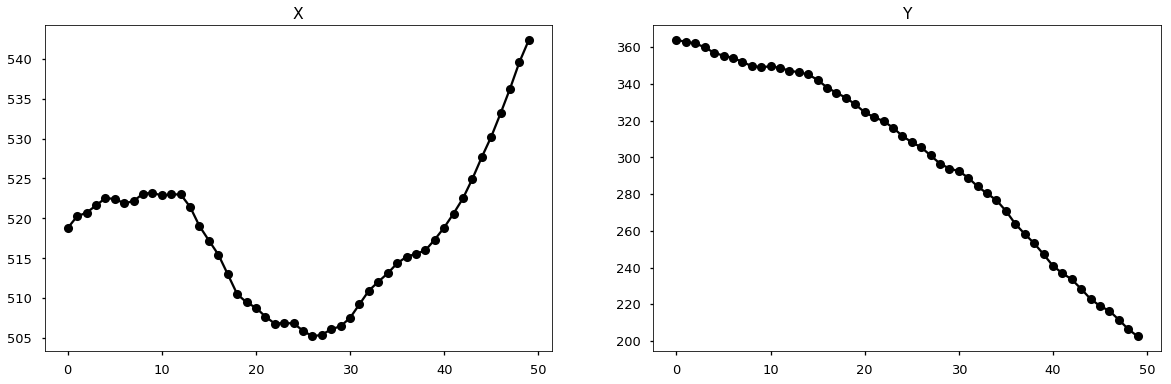

Experimental_1_150970
1.013593454765698


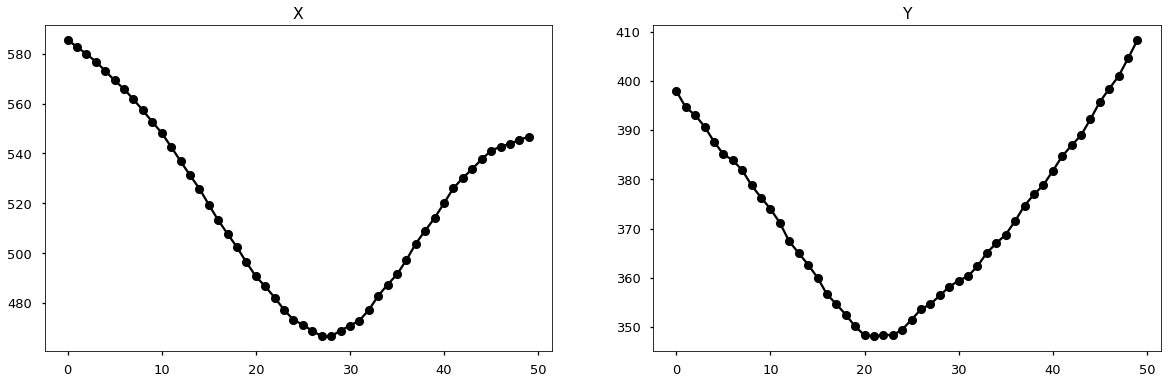

Experimental_1_52523
1.4954954549216166


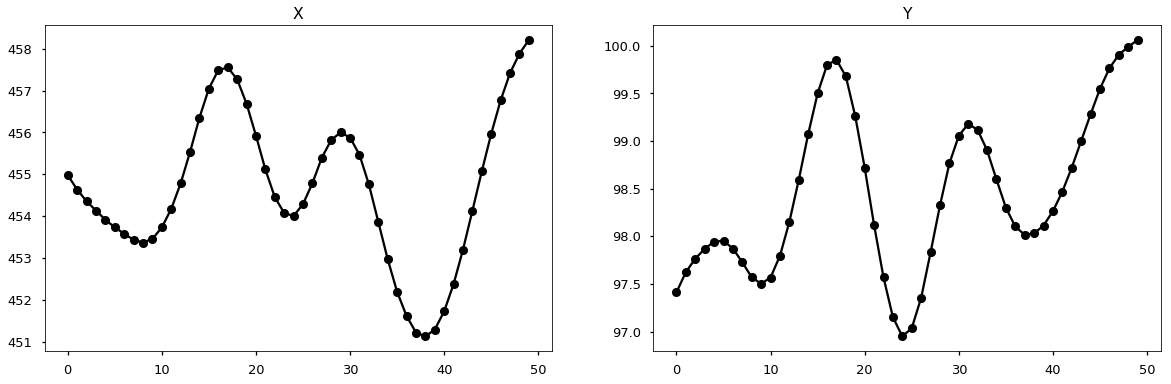

Experimental_2_50448
0.9527330233923914


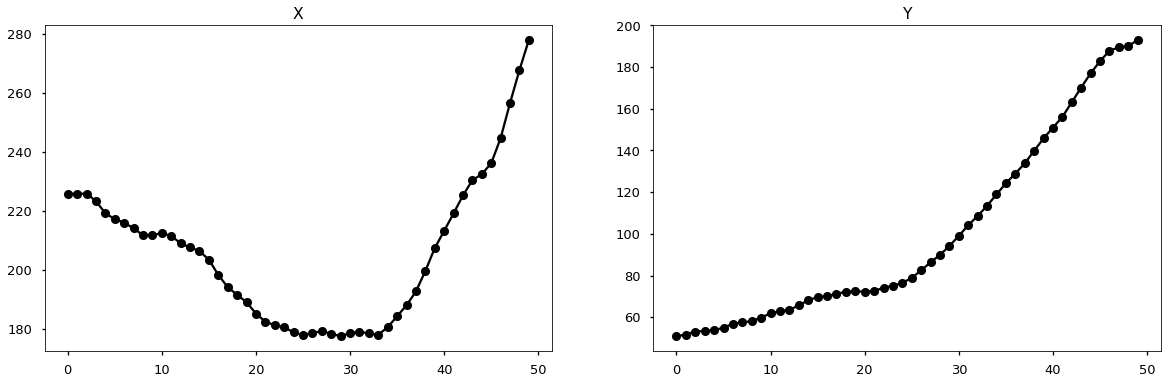

Experimental_3_47669
1.0734100029573455


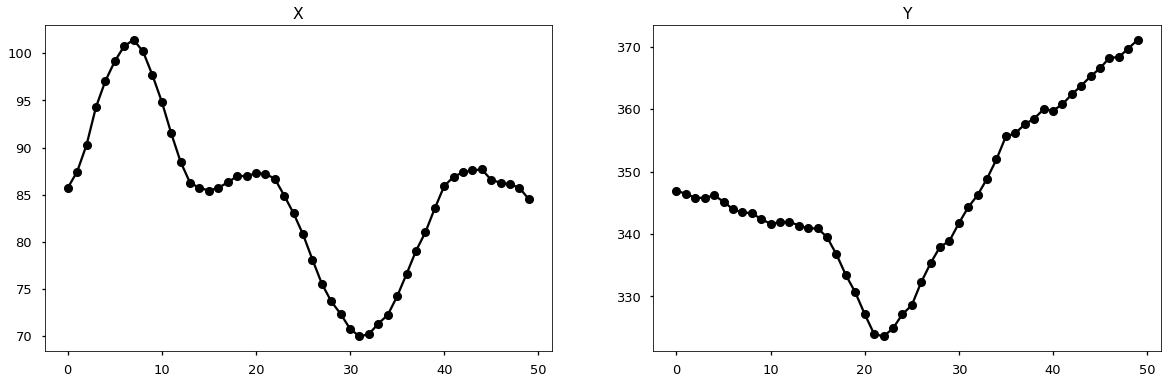

Experimental_4_66232
0.9231619849860441


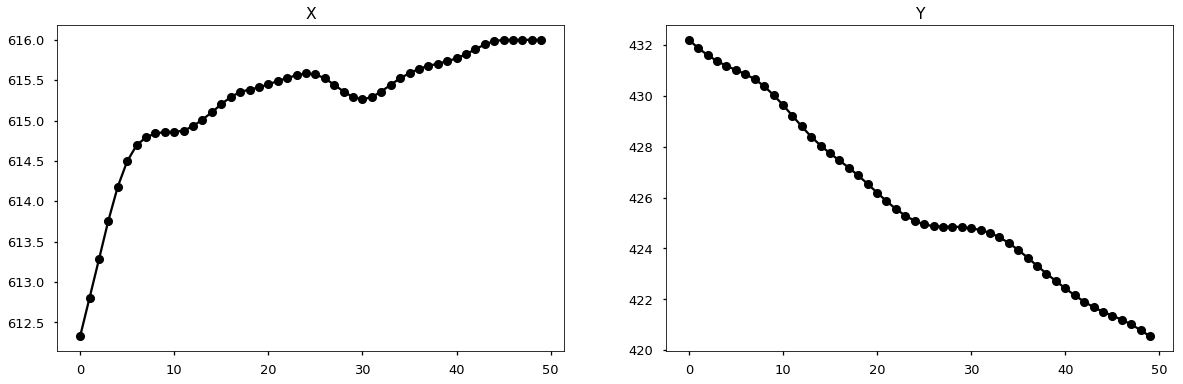

Experimental_4_72340
1.2130966016919214


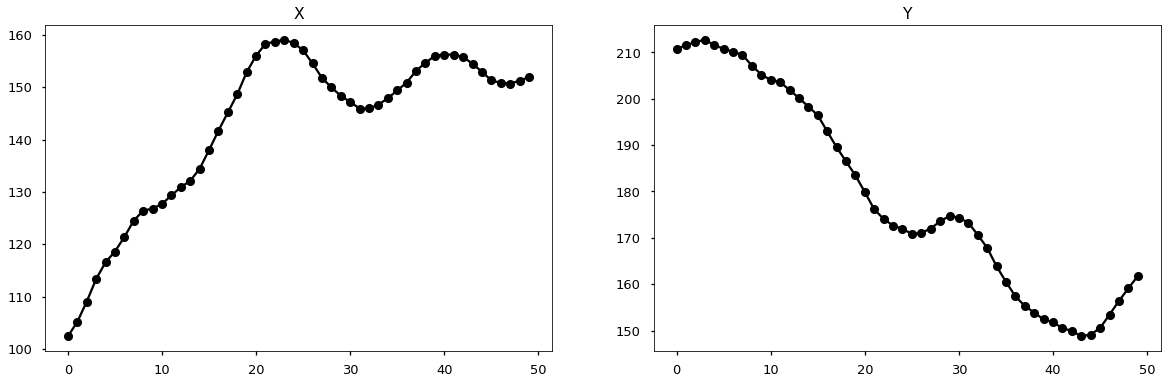

Experimental_5_59435
1.0556828551576671


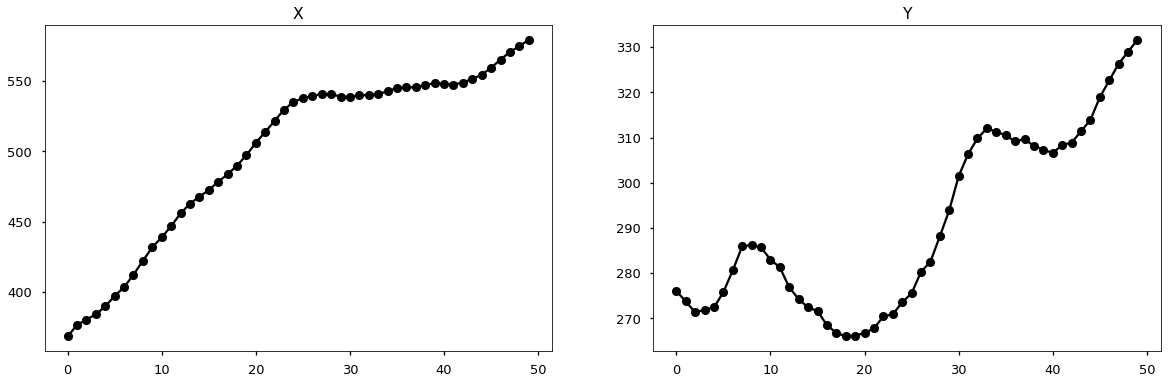

Experimental_7_36526
1.0258410078196958


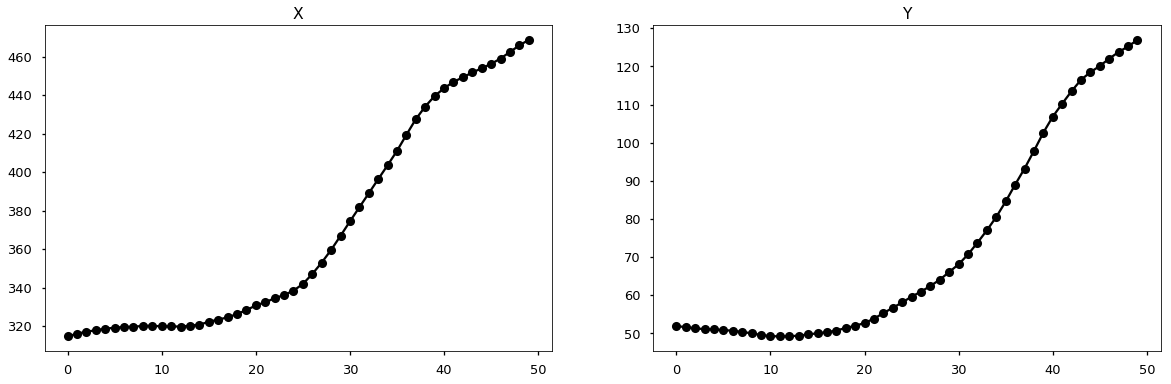

Experimental_7_40443
1.023664984197824


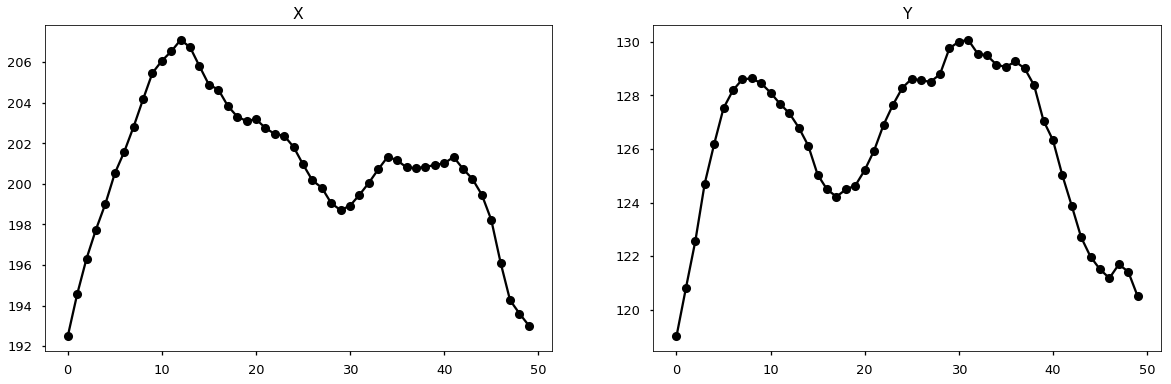

Experimental_7_41552
1.0068214133074365


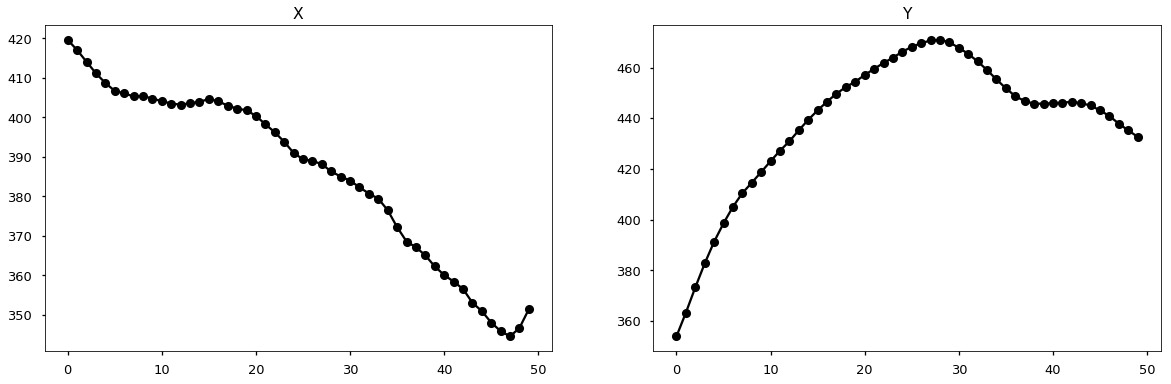

Experimental_7_54607
1.0394105548123402


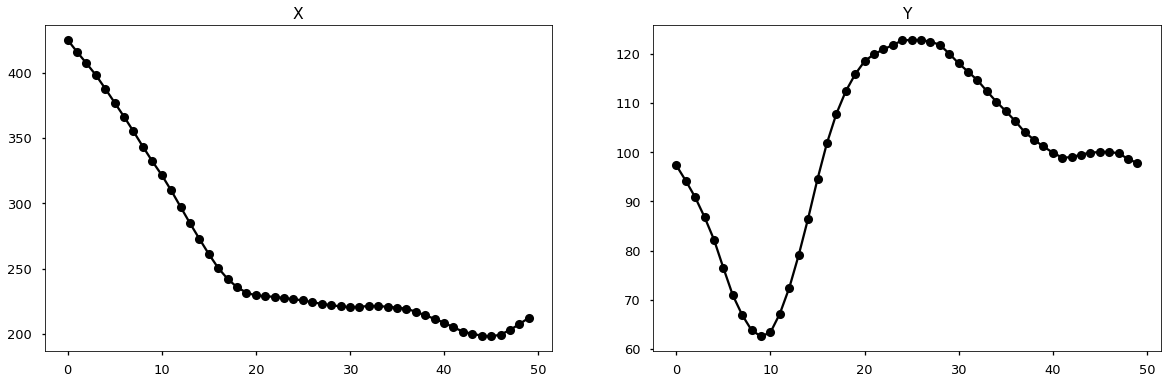

Sham_10_45293
1.1166822248376336


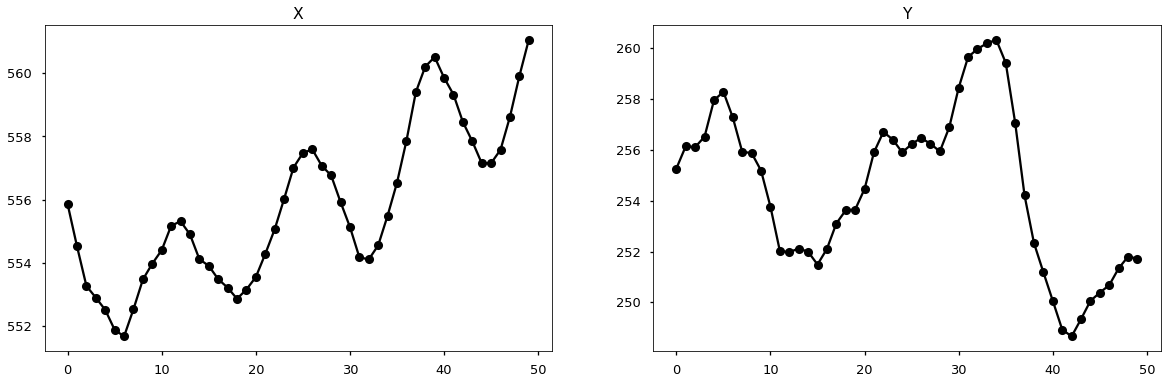

Sham_11_98276
0.9720468576172112


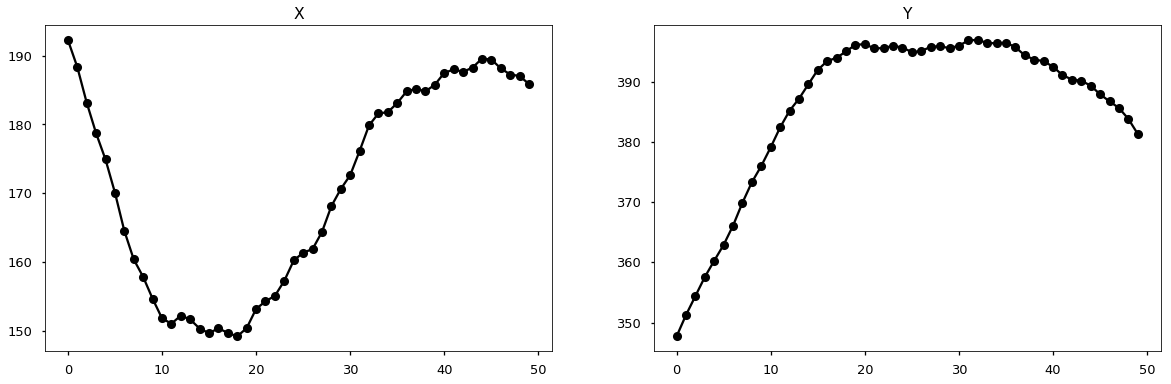

Sham_14_23923
1.0260933012309834


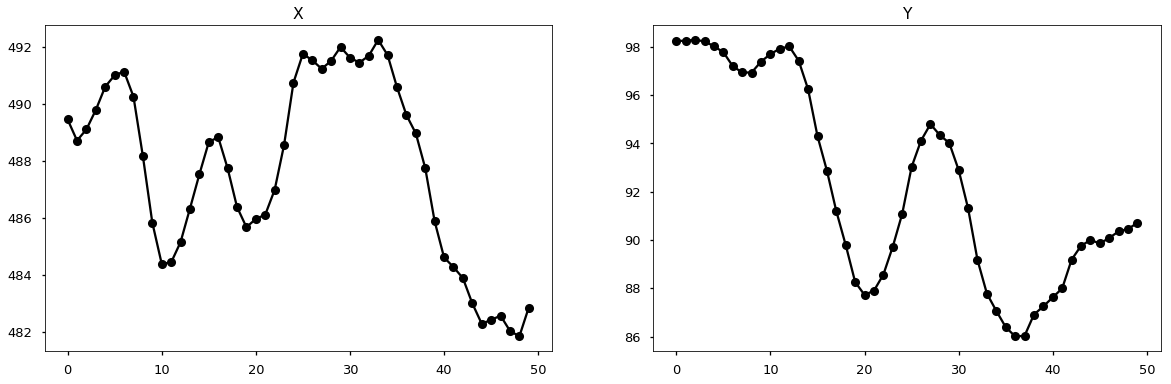

Sham_14_27298
0.9954801345444955


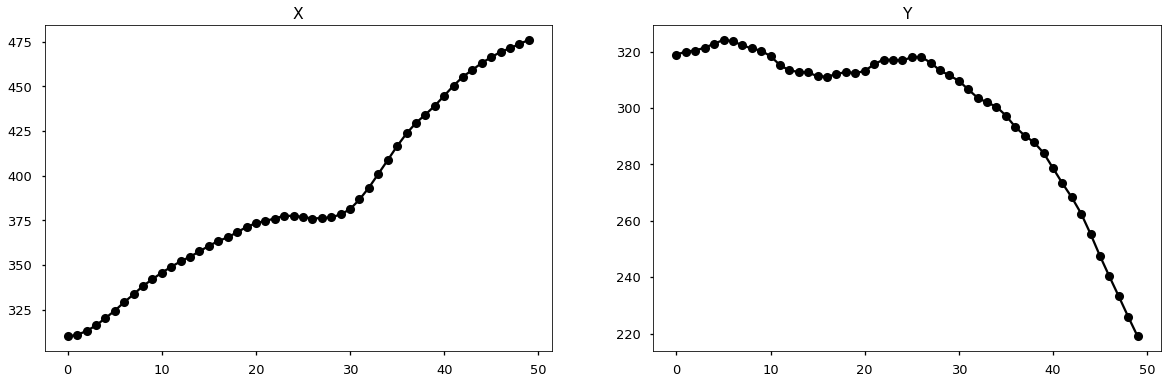

Sham_15_48082
nan


C:\Users\Daniellab\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


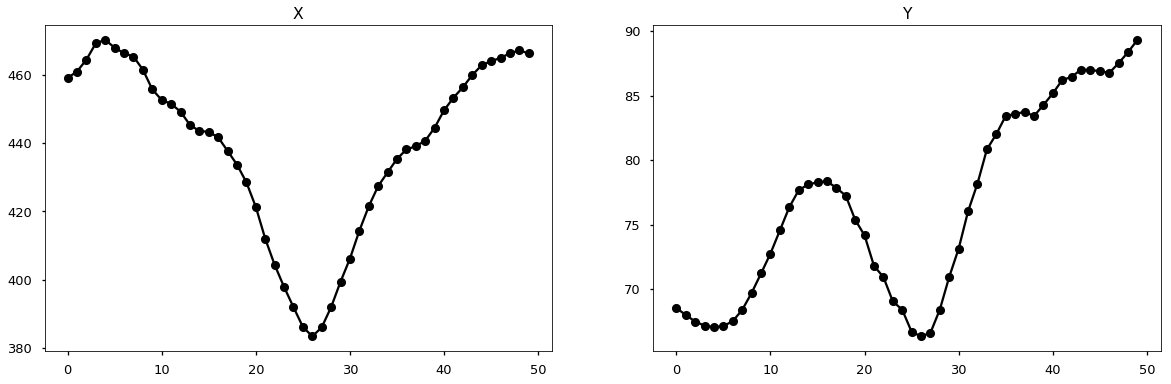

Sham_16_31431
0.9410996204907253


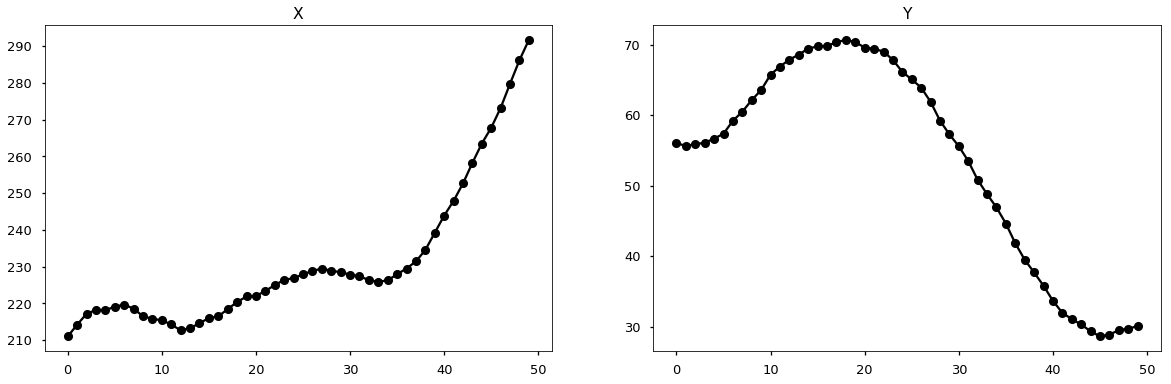

Sham_17_56491
0.9559737892069532


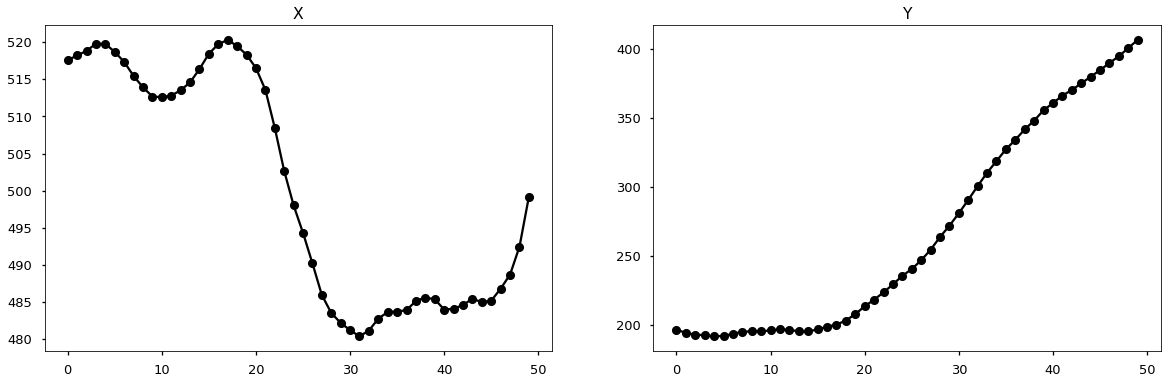

Sham_1_32201
0.9523102255828579


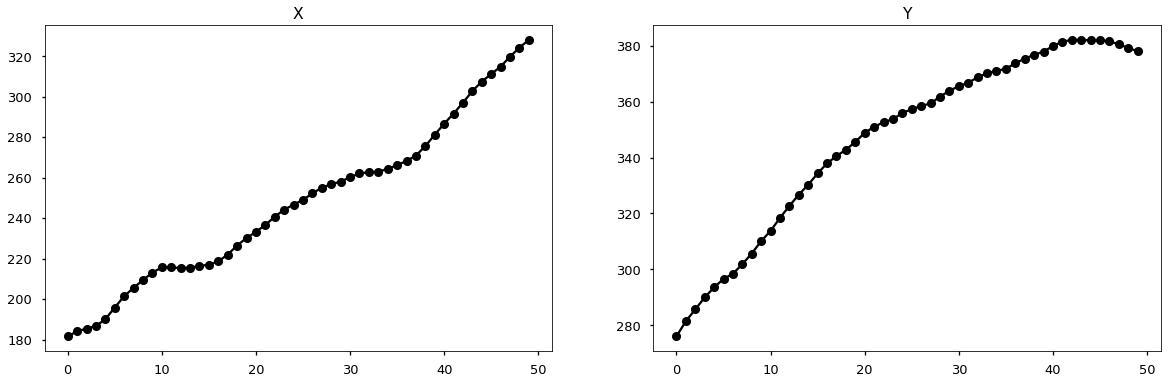

Sham_1_33803
1.022642852423778


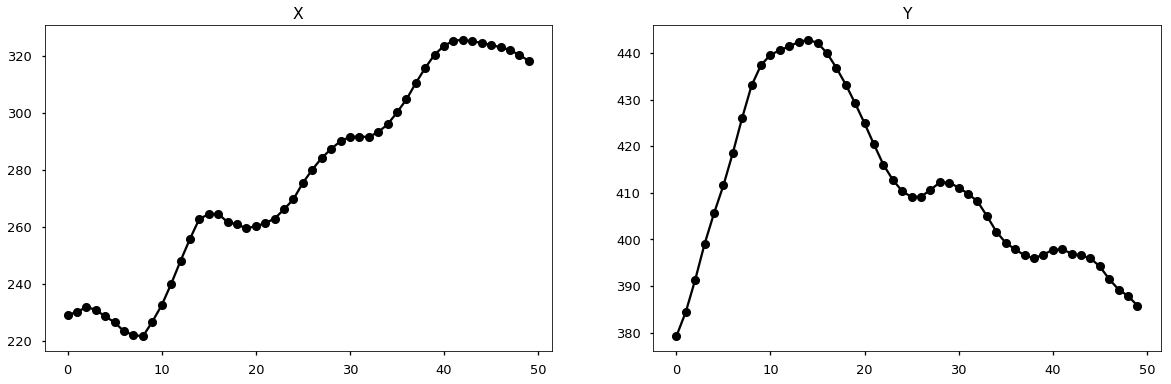

Sham_1_35598
0.9988831243789639


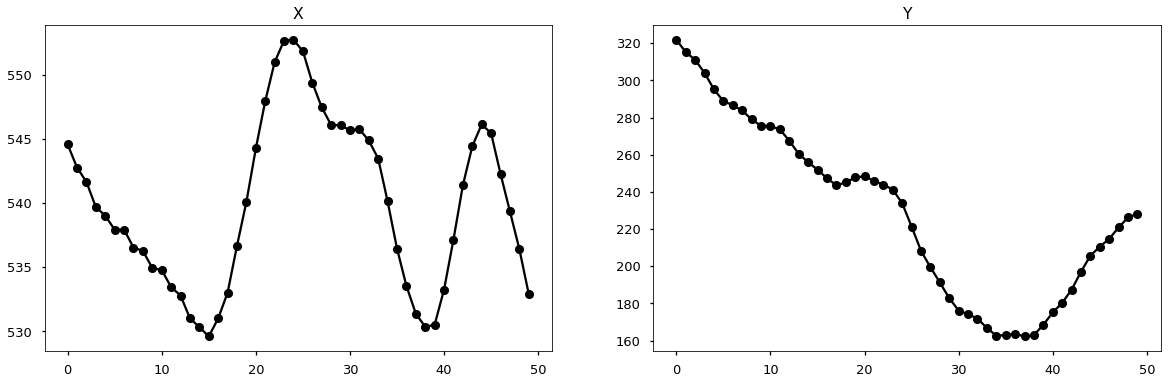

Sham_1_37142
1.0535737287838174


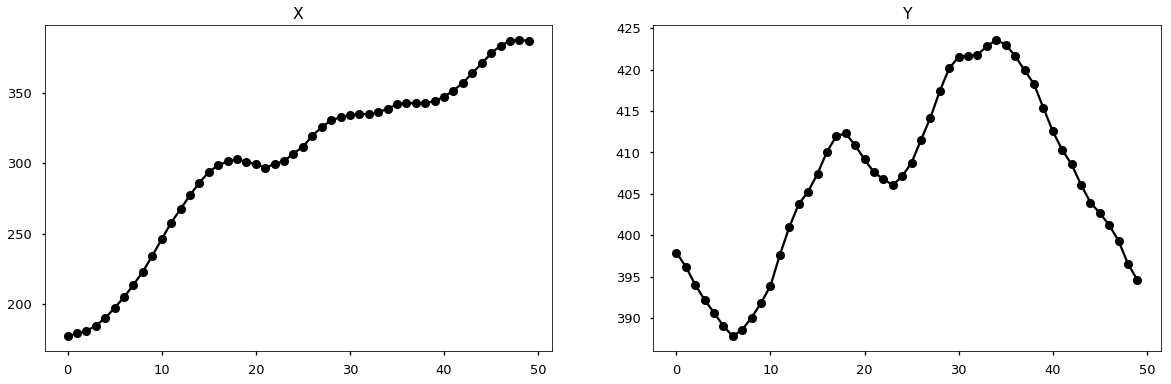

Sham_1_38514
0.9899807440921781


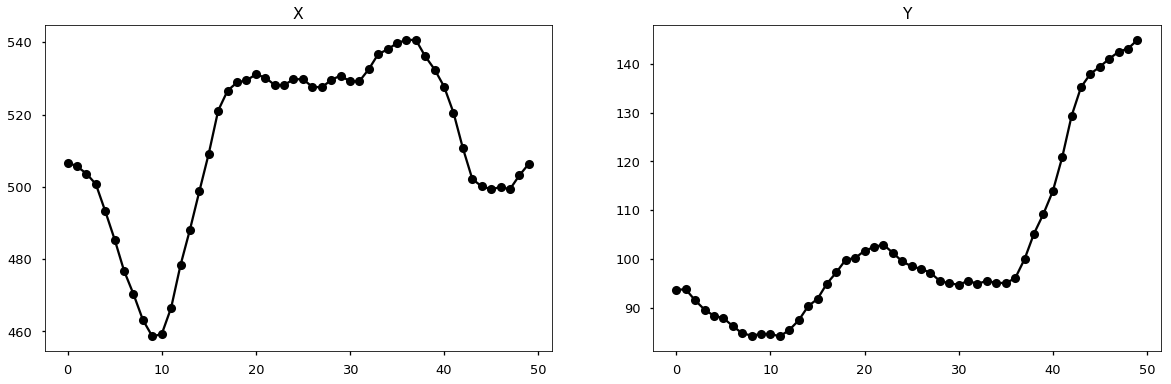

Sham_2_58256
0.9481358448702416


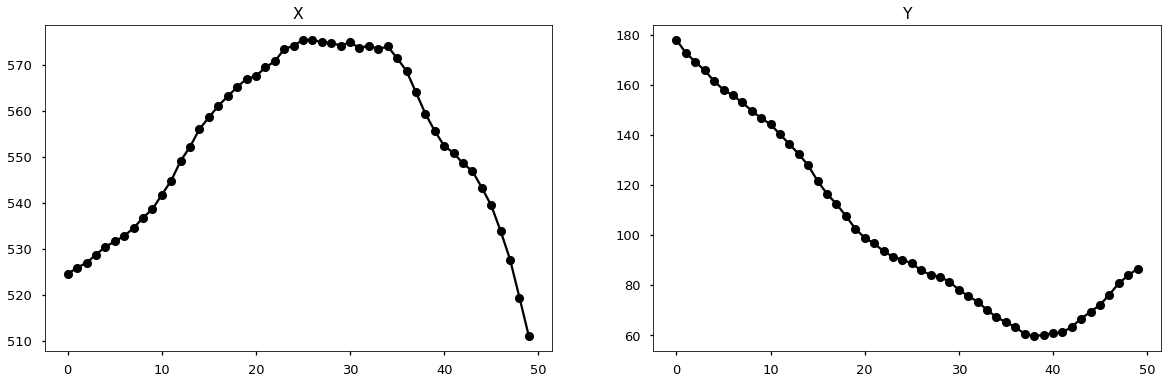

Sham_2_63666
0.9682764716097795


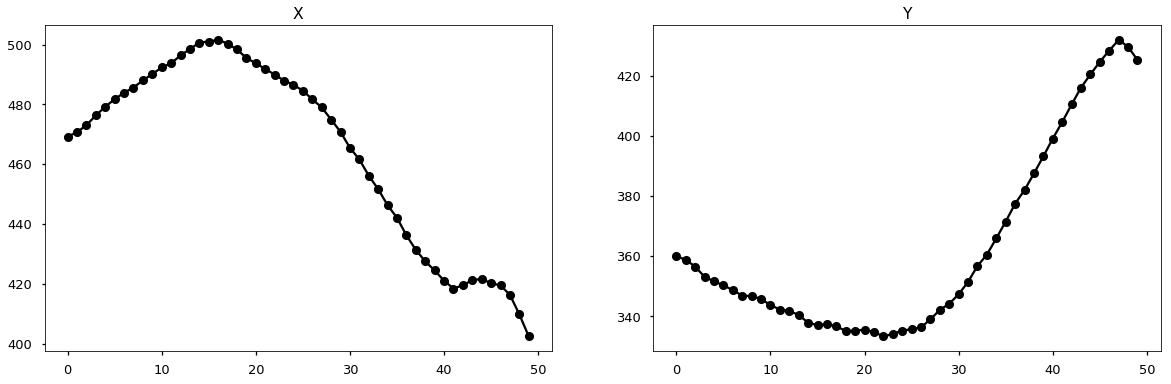

Sham_3_61200
0.9828159379997652


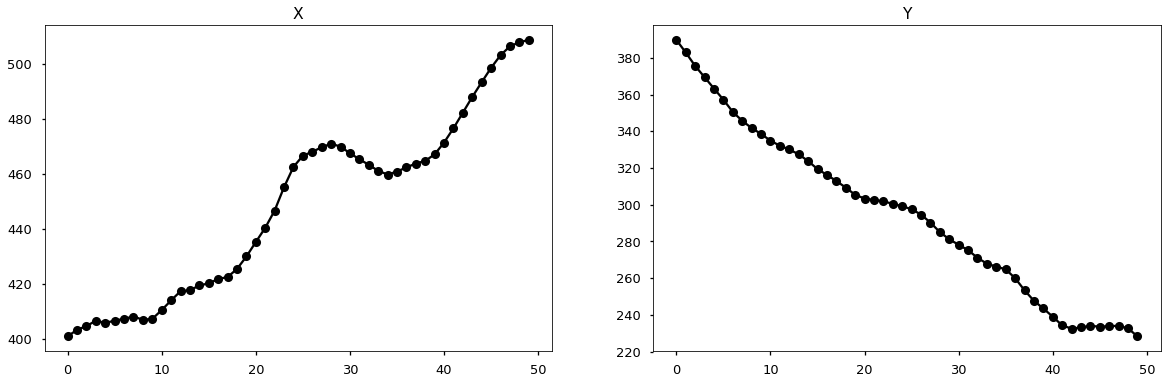

Sham_3_64660
0.9629497625325683


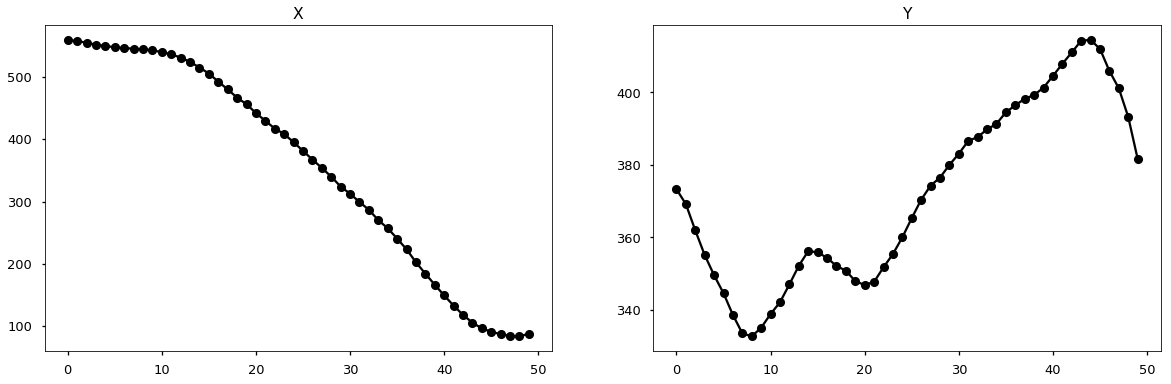

Sham_3_77208
0.9613383087903495


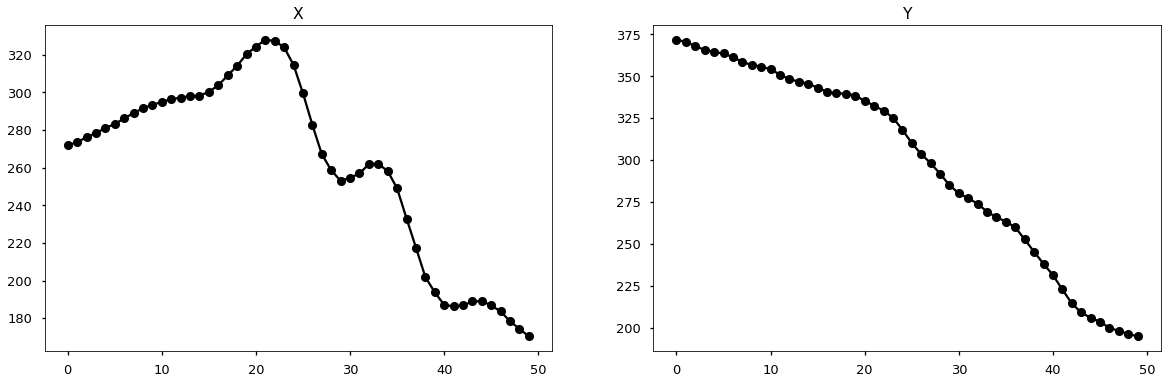

Sham_4_66374
0.9335438854118046


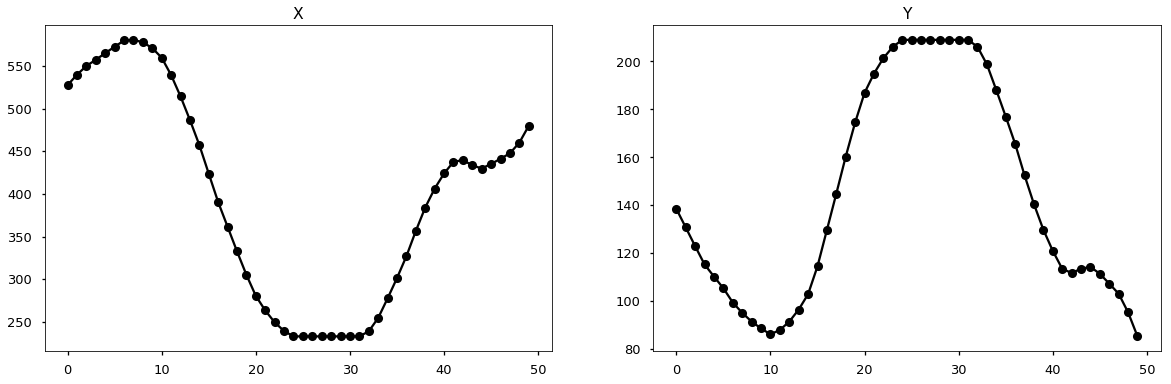

Sham_4_67307
1.035599334659821


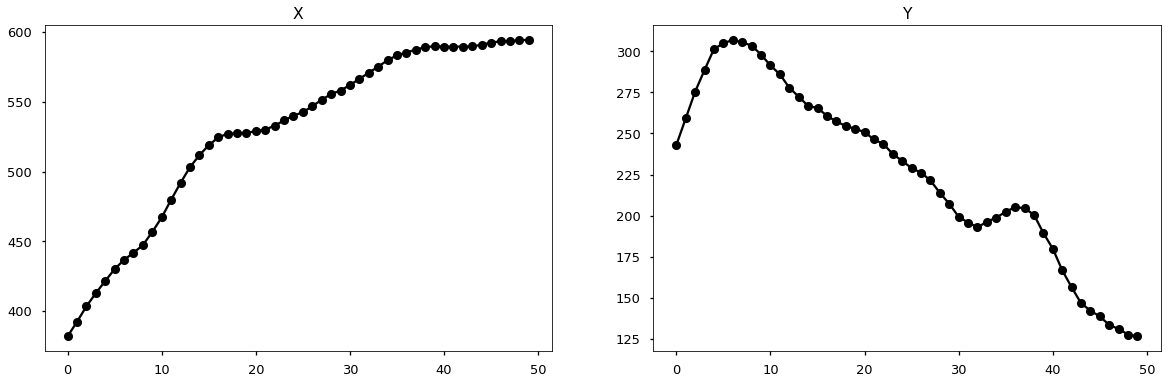

Sham_4_68526
0.9378805405903177


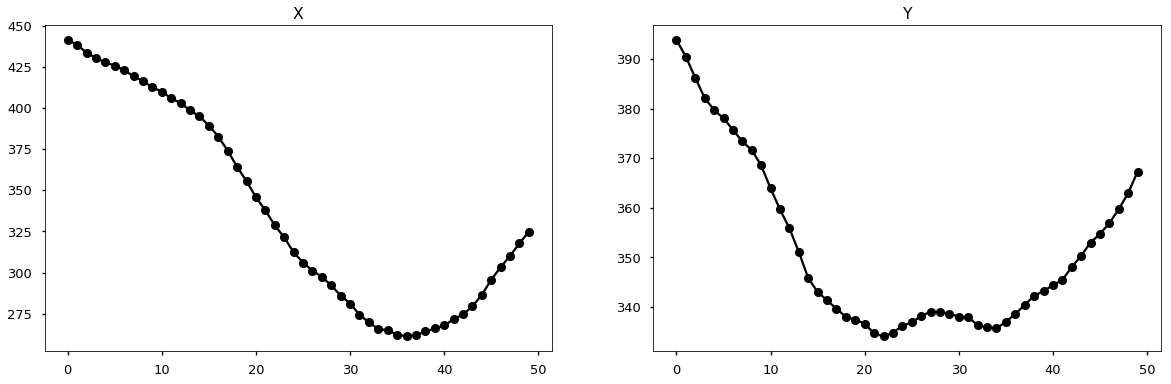

Sham_6_153286
0.9463125175702112


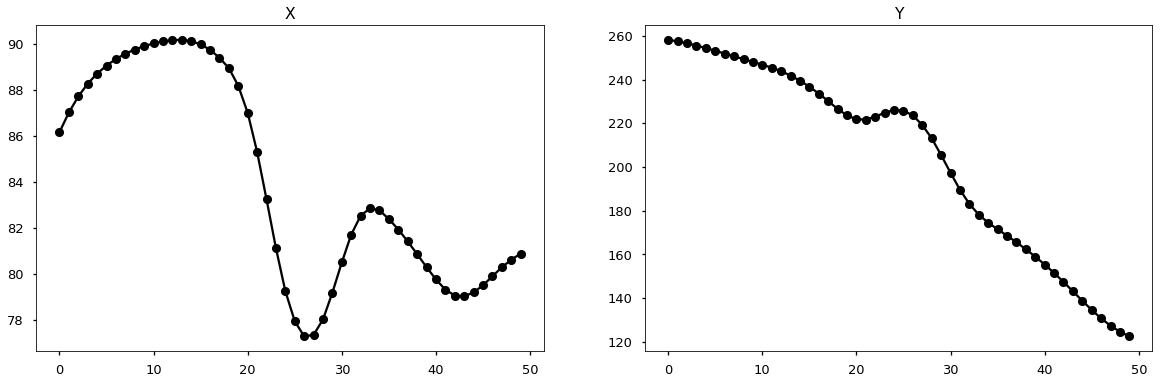

Sham_6_53914
0.9429749030598961


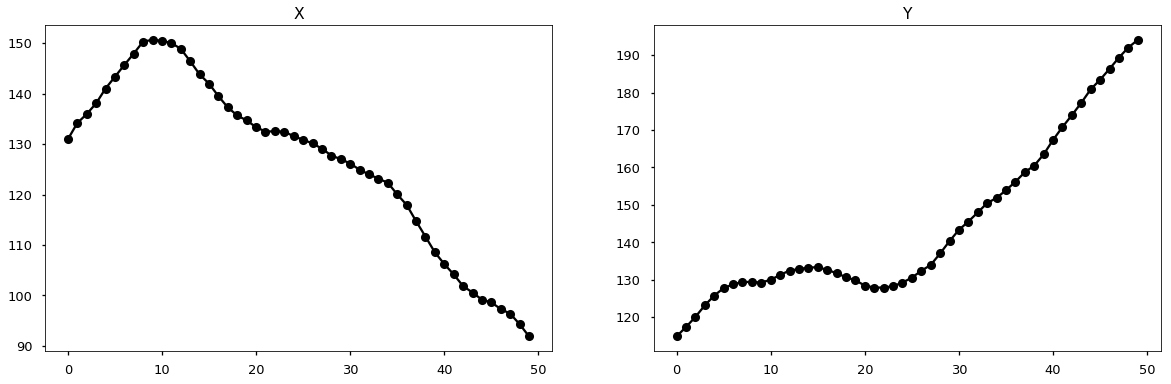

Sham_6_56319
0.9077473031630409


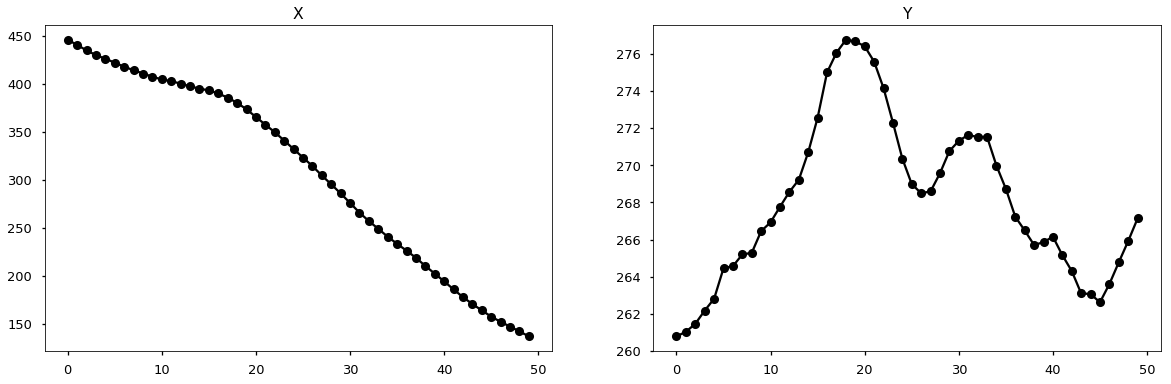

Sham_6_72273
1.028238663470687


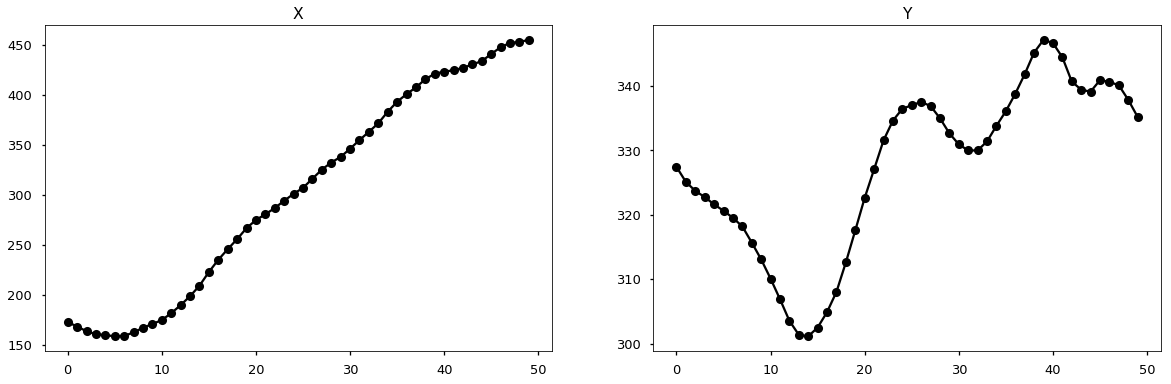

Sham_6_83460
1.152305800574151


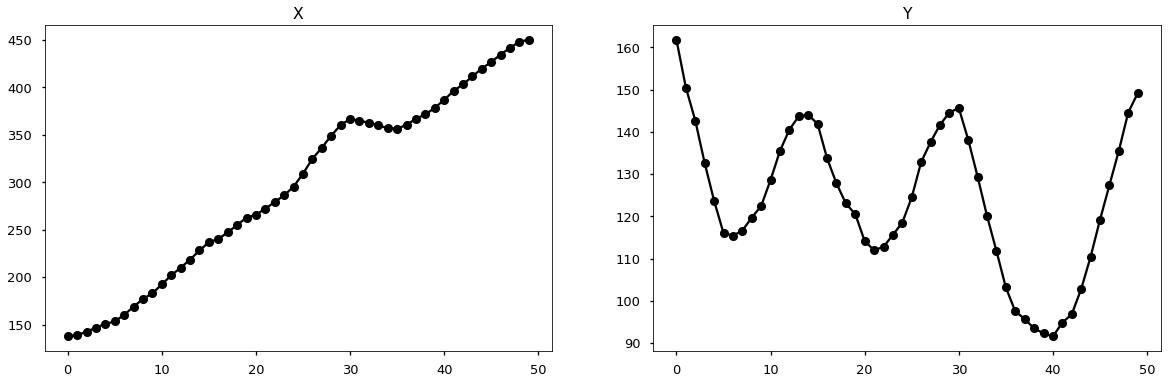

Sham_7_54387
0.9466681579854409


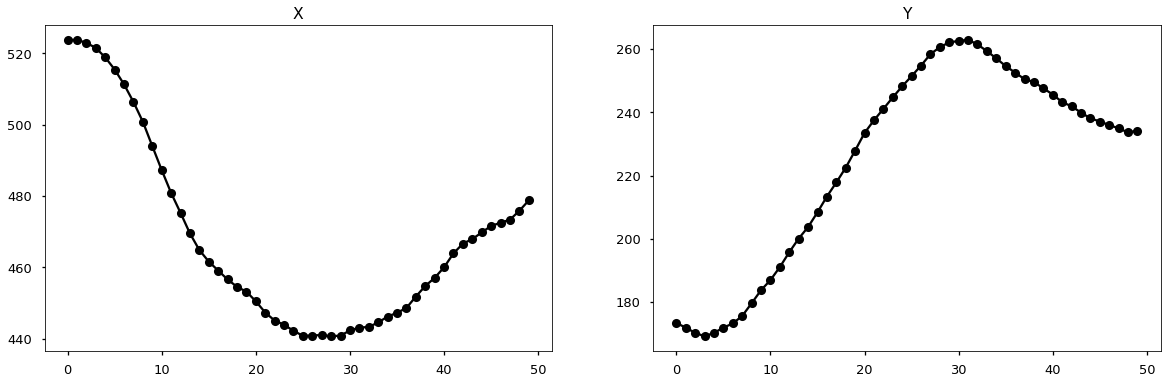

Sham_7_56021
1.0034938154519721


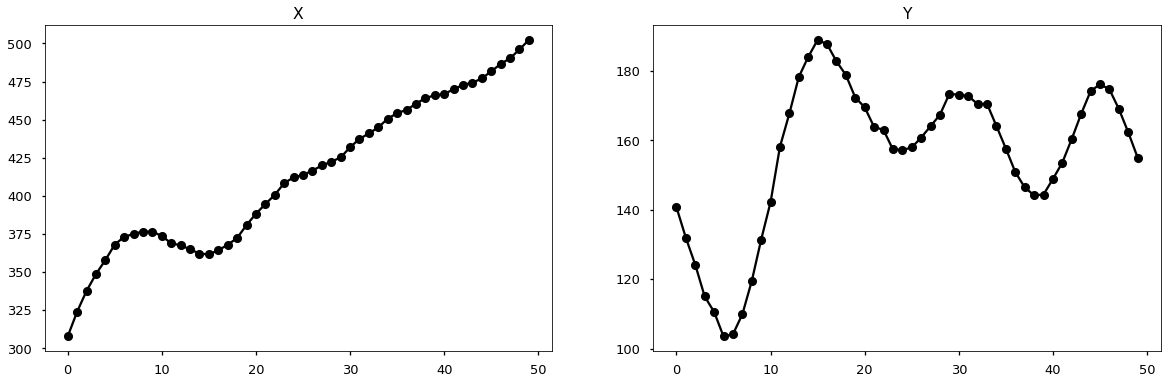

Sham_7_59103
1.1706268253790524


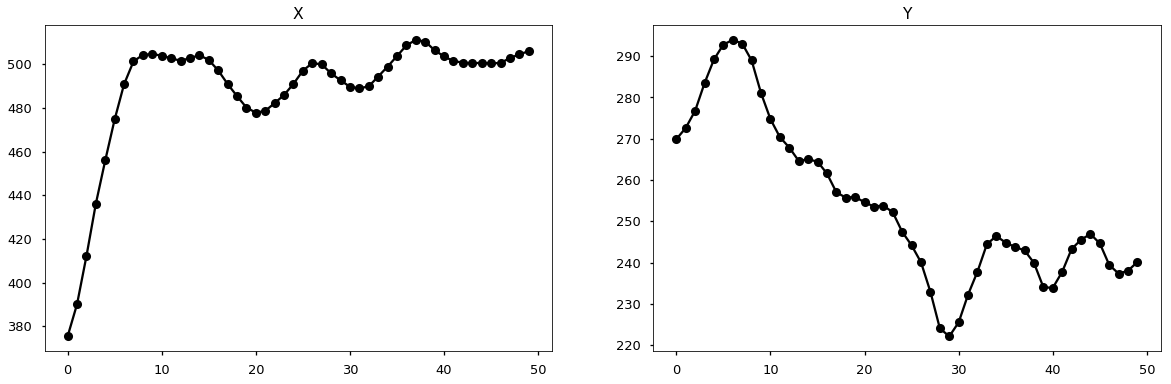

Sham_7_59901
0.9594899332323864


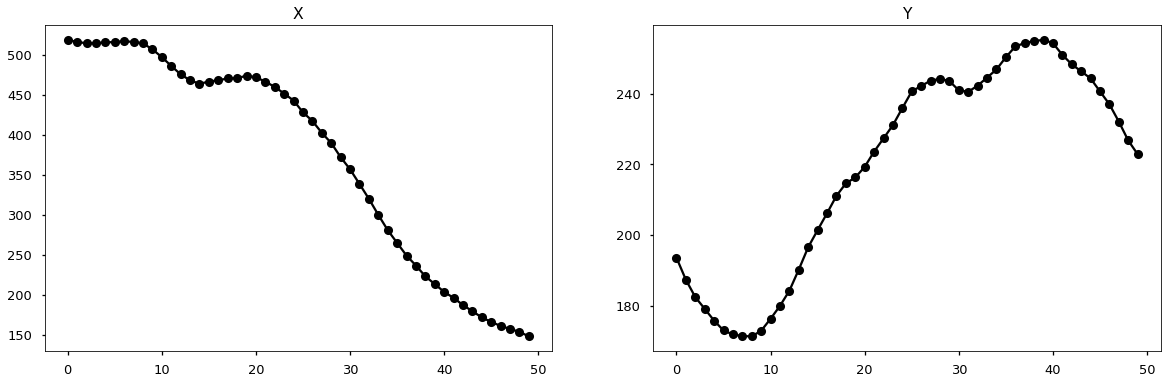

Sham_7_63837
1.148803160603877


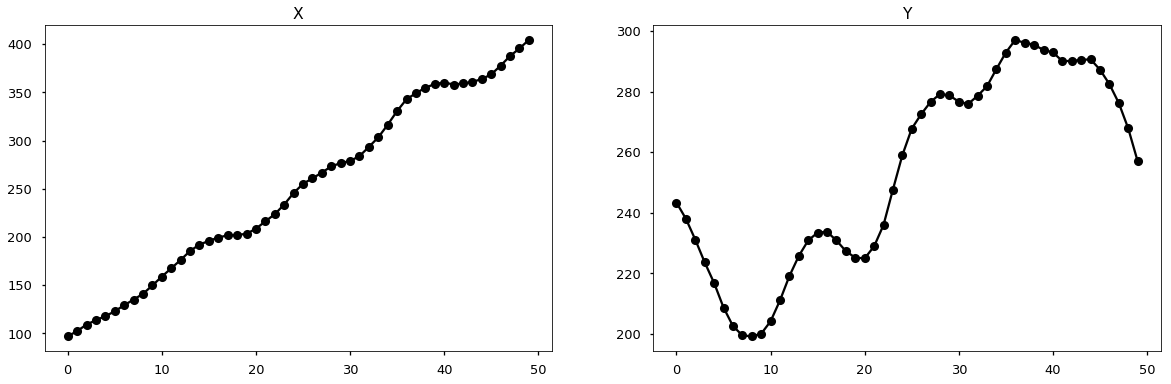

Sham_7_64471
0.9229765539717691


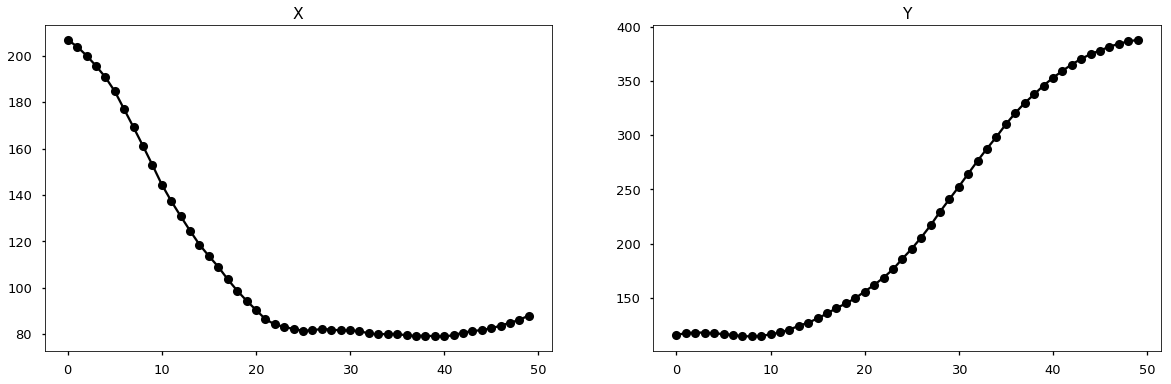

Sham_7_64994
0.954556450763268


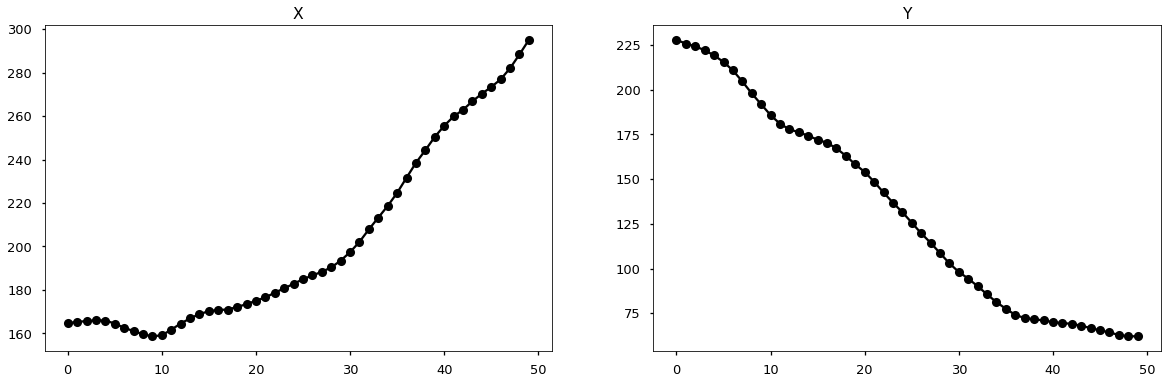

In [58]:
mean_list = []
std_list = []
visit_list = []
name_list = []
for element in csv_list:
    df = pd.read_csv(element)
   
    visit = df.visit_number[0]
    x, y = removeNaN(df)
    

    if len(x) > 100:
        name_list.append(element[81:-4])
            
        print(element[81:-4])
        mean, std = tortuosity_ratio(x,y, 10)
        
    
        
        mean_list.append(mean)
        std_list.append(std)
        visit_list.append(visit)

        
    
        fig, ax = plt.subplots(1,2, figsize = (20,6))


        print(mean)
        ax[0].set_title("X")
        ax[0].plot(x[50:100], "o-", c = "k")
        ax[1].set_title("Y")
        ax[1].plot(y[50:100], "o-", c = 'k')
#         plt.savefig(figpath + r"\\zoomed_scatter\50_100\\" + element[81:-4] + ".png")
        plt.show()

In [64]:
# mean_list = mean_list[0:2] + mean_list[3:]

In [65]:
# std_list = std_list[0:2] + std_list[3:]

In [66]:
# name_list = name_list[0:2] + name_list[3:]

In [67]:
# visit_list = visit_list[0:2] + visit_list[3:]

In [69]:
mean_list

[0.9208721271044904,
 1.013593454765698,
 0.9527330233923914,
 1.0734100029573455,
 0.9231619849860441,
 1.2130966016919214,
 1.0556828551576671,
 1.0258410078196958,
 1.023664984197824,
 1.0068214133074365,
 1.0394105548123402,
 1.1166822248376336,
 0.9720468576172112,
 1.0260933012309834,
 0.9954801345444955,
 0.9410996204907253,
 0.9559737892069532,
 0.9523102255828579,
 1.022642852423778,
 0.9988831243789639,
 1.0535737287838174,
 0.9899807440921781,
 0.9481358448702416,
 0.9682764716097795,
 0.9828159379997652,
 0.9629497625325683,
 0.9613383087903495,
 0.9335438854118046,
 1.035599334659821,
 0.9378805405903177,
 0.9463125175702112,
 0.9429749030598961,
 0.9077473031630409,
 1.028238663470687,
 1.152305800574151,
 0.9466681579854409,
 1.0034938154519721,
 1.1706268253790524,
 0.9594899332323864,
 1.148803160603877,
 0.9229765539717691,
 0.954556450763268]

In [70]:
#feed this into the mixed effects model in R
name_list_ = []
for name in name_list:
    if name.startswith('Sham'):
        name = name[:7]
        if name.endswith('_'):
            name = name[:-1]
    elif name.startswith('Experimental'):
        name = name[:15]
        if name.endswith('_'):
            name = name[:-1]
    
    name_list_.append(name)
#     print(name)
name_list = name_list_

In [71]:
len(mean_list),len(std_list), len(name_list), len(visit_list)

(42, 42, 42, 42)

In [72]:
condition = ["Experimental"]*11
condition.extend(["Sham"]*31)
new_df = (pd.DataFrame({'name' : name_list, 
                        'std': std_list, 'mean' : mean_list,
                        'condition': condition, 'visit_number': visit_list}))
new_df = new_df.sort_values(by=['name','visit_number'])
new_df.reset_index(drop=True, inplace=True)

In [73]:
new_df.to_csv(outpath + "\\" + "median_10.csv")